<a href="https://colab.research.google.com/github/Priyankamishra2098/Global-terrorism-datset-EDA/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.Importing Libraries and Dataset**

### Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported sucessfully")


Libraries imported sucessfully


### Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = "/content/drive/MyDrive/data/Global Terrorism Data.csv"
print("Dataset loaded sucessfully")

Dataset loaded sucessfully


### Reading of Dataset

In [4]:
data_ter = pd.read_csv(df,encoding = 'ISO-8859-1') 
print('Dataset Read Successfully')

Dataset Read Successfully


###Dimensions of Dataset

In [5]:
data_ter.shape

(181691, 135)

### Dataset First View

In [6]:
data_ter.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data_ter.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


## **2.Understanding the Variables**

###Dataset Information

In [8]:
data_ter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
data_ter.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Number of Duplicate Values in the Dataset

In [10]:
# Duplicate Values/Duplicate Values Count
data_ter.duplicated().sum()

0

### Null Values in the Dataset

In [11]:
# Missing Values/Null Values Count
pd.DataFrame(data_ter.isna().sum()).T

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,0,0,0,172452,0,179471,0,0,0,...,153402,66191,104758,138175,0,0,0,0,0,156653


###Total Number of Null Values

In [12]:
# Counting Total Number of Null Values
print('Total number of null values = ',data_ter.isnull().sum().sum())

Total number of null values =  13853997


###Checking Columns with more then 50% null values

In [13]:
# Calculating the percentage of null values in each column
null_percentages = data_ter.isnull().sum() / len(data_ter)

# Filtering columns with more than 50% null values
null_columns = null_percentages[null_percentages > 0.5].index.tolist()

# Printing the columns with more than 50% null values
print(null_columns)


['approxdate', 'resolution', 'location', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnot

###Correlation Matrix

In [14]:
# calculating the correlation matrix
corr_matrix = data_ter.corr()

# printing the correlation matrix
print(corr_matrix)

            eventid     iyear    imonth      iday  extended   country  \
eventid    1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear      0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth     0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday       0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended   0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...             ...       ...       ...       ...       ...       ...   
nreleased -0.181612 -0.181556 -0.011535  0.001765 -0.192155 -0.044331   
INT_LOG   -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO  -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC  -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY   -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

             region  latitude  longitude  specificity  ...  ransomamt  \
eventid    0.401371  0.166886   0.003907     0.030

###**3.Pre-Processing and Cleaning of Data**

###Dropping any column in the DataFrame df that contains all missing values (i.e., NaN).

In [15]:
data_ter.dropna(axis=1,how='all')
data_ter.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [16]:
#replacing Na values of every column with dtype as float64 by  mean 
#list_num_col = data_ter.select_dtypes(include = ["float64"]).columns.to_list()
#for i in list_num_col:
 # data_ter.loc[:, i] = data_ter[i].fillna(data_ter[i].mean())


In [17]:
#replacing Na values of every column with dtype as object by mode
#list_str_col = data_ter.select_dtypes(include = ["object"]).columns.to_list()
#for i in list_num_col:
  #data_ter.loc[:, i] = data_ter[i].fillna(data_ter[i].mode()[0])


###Renaming and Selecting Required Columns

In [36]:
# Renaming some columns for easier use
data_ter.rename(  columns = {'iyear':'Year','imonth':'Month','iday':'Day',
                           'eventid':'Eventid','approxdate':'Date',
                           'region_txt':'Region','country_txt':'Country',
                           'attacktype1_txt':'Attack_Type','target1':'Target',
                           'nkill':'Killed','nwound':'Wounded','gname':'Group',
                           'targtype1_txt':'Target_Type','motive':'Motive',
                           'weaptype1_txt':'Weapon_Type','provstate':'State'},
                inplace=True      )

In [37]:
# Selecting Required Columns for Analysis
df = data_ter[['Year','Month','Day','Country','State','Region','city','Motive',
           'latitude','longitude','Attack_Type','Killed','Wounded','Target',
           'summary','Group','Target_Type','Weapon_Type']]
df['Casualities'] = df['Killed']+df['Wounded']


###Extracting New Data

In [20]:
df.head(2)

,Year,Month,Day,Country,State,Region,city,Motive,latitude,longitude,Attack_Type,Killed,Wounded,Target,summary,Group,Target_Type,Weapon_Type,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,NaN,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,0.0


###Shape of Processed Data

In [25]:
df.shape

(181691, 19)

### Modifications Done and Insights Gained

This Global Terrorism Dataset (GTD) is a widely used dataset on terrorism worldwide, covering incidents from 1970 to 2017. The GTD includes a wide range of variables for each incident.Thus, the dataset is extremely large, consisting of 181691 rows and 135 columns with data types : float64(55), int64(22), object(58).

Upon checking for duplicate values i got to know that there are no duplicate values in the dataset.Checking for null values in a dataset is also important step in data cleaning and preparation, as null values can have a significant impact on data analysis and modeling. So to ensure that data is accurate and reliable, and that it can be used effectively I identified the null values with total count of 13853997, and then handled by Dropping any column in the DataFrame df that contains all missing values (i.e., NaN).





Identified the columns with more than 50 % Null/Missing values.
To understand the relationships between variables in the dataset,and select variables for further analysis I took help of Correlation Matrix. 
Simplified the column names for easier use by renaming them. Since the dataset is huge I selected required columns for analysis. 
Added a new column 'Casualities'='Killed'+'Wounded'.
The shape of new processed data is(181691, 19).

##**5.Basic Analysis** 

###Total count of region in the Dataset

In [27]:
print('The Total count of Region in the Dataset is\n:',df['Region'].value_counts())

The Total count of Region in the Dataset is
: Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


###Total count of group in the Dataset

In [28]:
print('The Total count of Groups in the Dataset is\n:',df['Group'].value_counts())

The Total count of Groups in the Dataset is
: Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64


###Total count of Cities in the Dataset

In [29]:
print('The Total count of Cities in the Dataset is\n:',df['city'].value_counts())

The Total count of Cities in the Dataset is
: Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64


###Total count of Attack type in the Dataset

In [30]:
print('The Total count of Attack type in the Dataset is\n:',df['Attack_Type'].value_counts())

The Total count of Attack type in the Dataset is
: Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64


###Total count of Target type in the Dataset

In [31]:
print('The Total count of Target type in the Dataset is\n:',df['Target_Type'].value_counts())

The Total count of Target type in the Dataset is
: Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_Type, dtype: int64


###Statistical Summary of Data

In [32]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [ ]:
print(u"\u2022",'Country with Highest terrorist Attacks :',df['Country'].value_counts().index[0])
print(u"\u2022",'Regions with Highest Terrorist Attacks :',df['Region'].value_counts().index[0])
print(u"\u2022",'Most used Attack Type :',df['Attack_Type'].value_counts().idxmax())
print(u"\u2022",'Maximum people killed in an attack are :',df['Killed'].max(),
      'that took place in',df.loc[df['Killed'].max()].Country)
print(u"\u2022",'Year with the most attacks :',df['Year'].value_counts().idxmax())
print(u"\u2022",'Year with the least attacks :',df['Year'].value_counts().idxmin())
print(u"\u2022",'Most Active Terror Group :',df['Group'].value_counts().index[1])

• Country with Highest terrorist Attacks : Iraq
• Regions with Highest Terrorist Attacks : Middle East & North Africa
• Most used Attack Type : Bombing/Explosion
• Maximum people killed in an attack are : 1570.0 that took place in United States
• Year with the most attacks : 2014
• Year with the least attacks : 1971
• Most Active Terror Group : Taliban


##4.**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###CHART1 : Distribution of Data on Each Series 

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Killed'}>],
       [<Axes: title={'center': 'Wounded'}>,
        <Axes: title={'center': 'Casualities'}>, <Axes: >]], dtype=object)

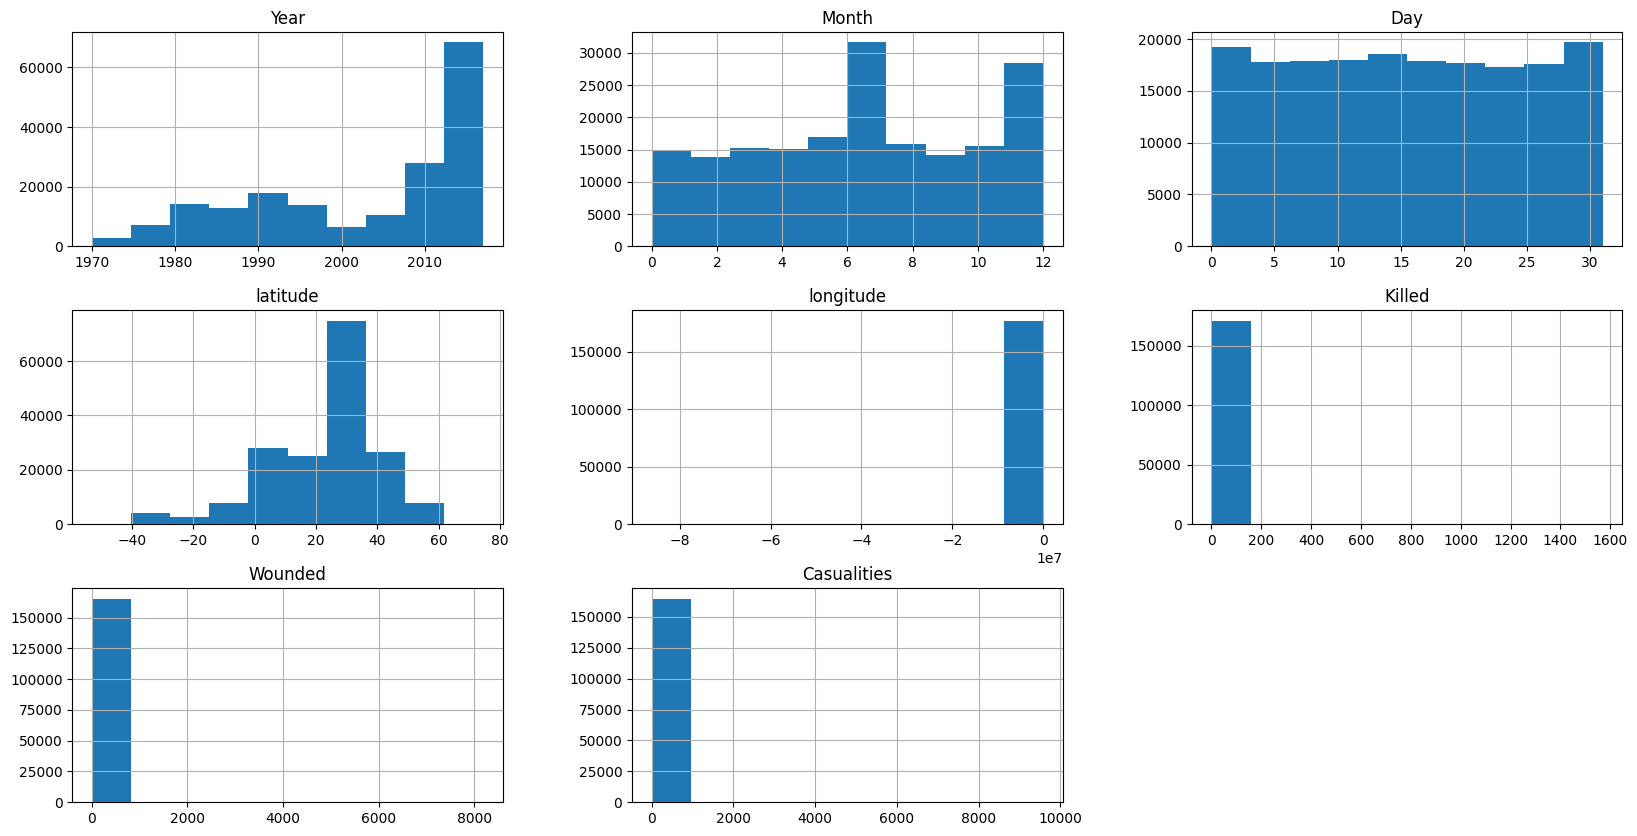

In [34]:
# Chart1 : Histogram showing distribution of Data
df.hist(figsize=(20,10))

###CHART2 : Heatmap of Correlation among the columns

<function matplotlib.pyplot.show(close=None, block=None)>

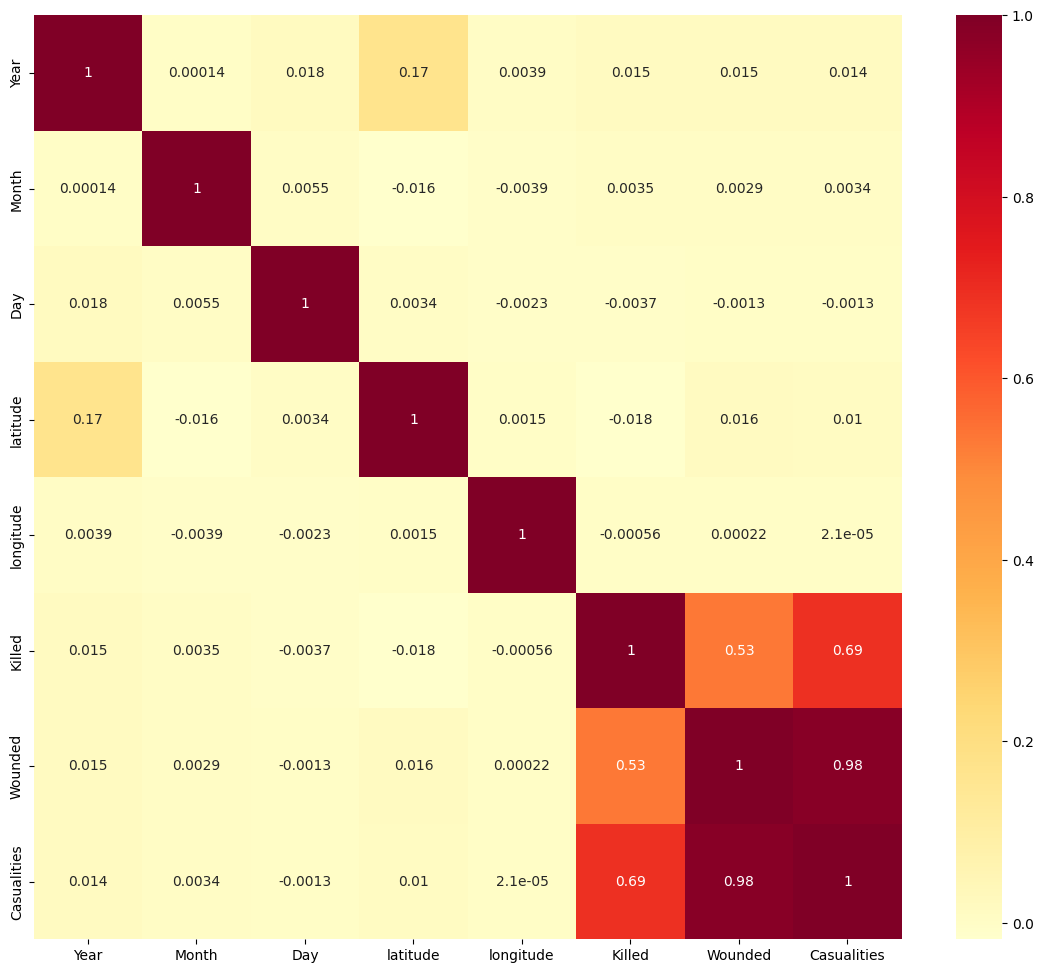

In [35]:
fig,axes = plt.subplots(1,1,figsize = (14,12))
sns.heatmap(df.corr(),annot = True,cmap = "YlOrRd"
)
plt.show

###CHART3 : Number of Terrorist Activities Each Year

<function matplotlib.pyplot.show(close=None, block=None)>

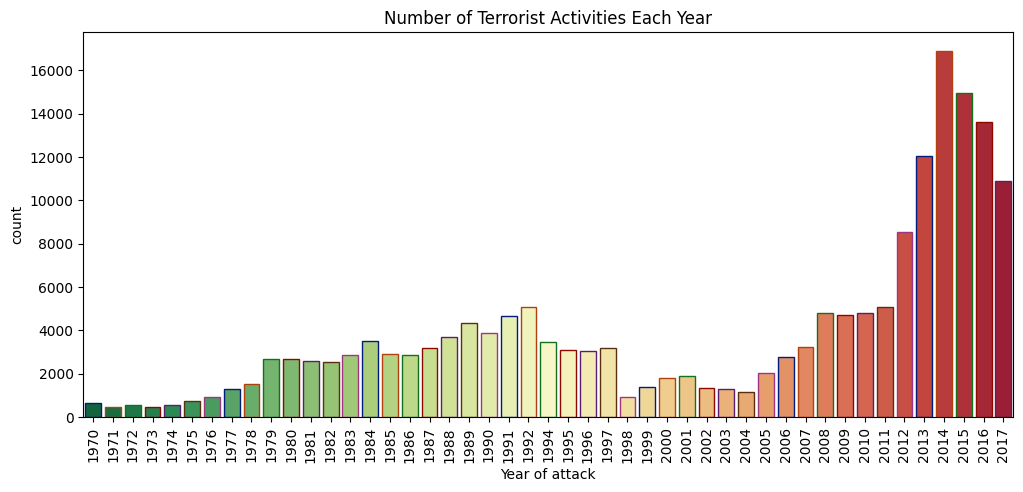

In [38]:
# Countplot to visualize Terrorist Attacks in different year
plt.subplots(figsize=(12,5))
sns.countplot(x='Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities Each Year')
plt.show

##### 1. Why did you pick the specific chart?

  Countplots allow us to quickly and easily visualize the frequency of       categorical variables in our dataset.


  Thus,I have used counplot to visualize the frequency of attacks in different years. 


  By counting the number of attacks that occurred in each year and plotting the counts on a bar chart, I can quickly see which years had the most and least number of attacks.

##### 2. What is/are the insight(s) found from the chart?

1.The number of terrorist attacks increased significantly in the 2000s, peaking in 2014 with over 16,000 attacks worldwide.


2.Prior to the 2000s, the number of attacks remained relatively low, with fewer than 1,000 attacks per year in the 1970s and 1980s, and approximately 
2,000 attacks per year in the 1990s.


3.The 1980s saw a sharp increase in the number of attacks, with a peak of over 4,500 attacks in 1987.

4.The early 2000s saw a brief decrease in the number of attacks, likely due to increased global security measures following the 9/11 attacks in 2001.

   But then increase in number of attacks after around 2005 shows that the security measures taken lacks somewhere and needs to be revised and followed strictly.


 There is significant variability in the number of attacks from year to year, with some years showing dramatic increases or decreases in the number of attacks.

##### 3. Will the gained insights help creating a positive impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

  Definately Yes, the policy makers, security agencies,and other stakeholders can be greatly benefited from the information gained through insights from the countplot of the number of terrorist attacks in different years and can potentially create a positive impact in this regard.


  It can help in allocating resources and implementing effective strategies for preventing and responding to terrorist attacks. Additionally, understanding the changing patterns and trends in global terrorism can inform the development of targeted initiatives to address the root causes of terrorism, such as poverty, inequality, and political instability.


  However, the insights can also lead to negative growth if they are used to promote fear and panic among the public, or to justify discriminatory or oppressive policies against certain groups or communities. 


  In short, the gained insights from the countplot can potentially help create a positive impact in the fight against terrorism, but it is important to use them in a responsible and ethical manner to avoid any negative consequences.



###CHART4 : Terrorist Activities by Region in each Year

<function matplotlib.pyplot.show(close=None, block=None)>

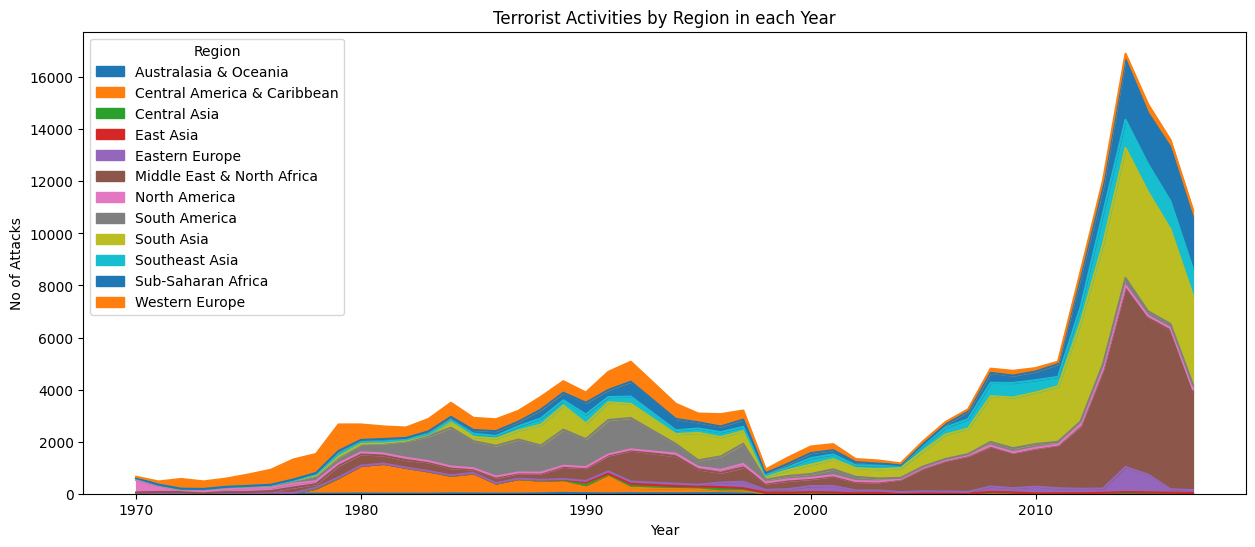

In [40]:
# Crosstab to visualize the Terrorist activities across region in different year
pd.crosstab(df.Year,df.Region).plot(kind = 'area',figsize=(15,6))
plt.title("Terrorist Activities by Region in each Year")
plt.ylabel("No of Attacks")
plt.show

##### 1. Why did you pick the specific chart?

  Crosstab  allows us to create a table that displays the frequency distribution of variables across different categories. 
  
  I have used Crosstabulation, or crosstab  to analyze the relationship between the regions where terrorist activities occurred and the year in which they occurred.


  By visualizing the data in this way, I can easily identify trends and patterns in terrorist activities across different regions and over time. I can identify regions that have experienced a high number of terrorist activities over the years, as well as those that have seen a decrease or increase in the frequency of attacks.


##### 2. What is/are the insight(s) found from the chart?

 1.Middle East & North Africa (MENA) and South Asia are the most affected regions in terms of the number of terrorist incidents.MENA experiencing a highest attacks in the early 2000s and South Asia seeing a surge in the number of attacks since the mid-2000s.

 2.Europe, Latin America & Caribbean, and Sub-Saharan Africa have also experienced a significant number of terrorist incidents, with Europe experiencing a surge in the number of attacks in the 1970s and 1980s, and Latin America & Caribbean and Sub-Saharan Africa seeing a increase in the number of attacks in the 2000s.

 3.North America, East Asia, and Southeast Asia have relatively lower numbers of terrorist incidents compared to other regions. North America experienced a surge in the number of attacks in the 1970s and 1980s, while East Asia and Southeast Asia have seen a rise in the number of attacks in the 2000s.

 4.The number of terrorist incidents has generally increased over time, with a sharp rise in the 2000s. This increase can be attributed to a number of factors, including the rise of extremist ideologies, the proliferation of weapons, and the spread of terrorism to new regions.

##### 3. Will the gained insights help creating a positive impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

  The insights can help create a positive impact by informing policies and strategies to prevent and respond to terrorist activities in different regions. By understanding the patterns and trends of terrorism over time and across different regions, governments and organizations can address the root causes of terrorism, improve security measures, and reduce the impact of terrorism on communities.

  However, some of the insights may also lead to negative growth if not addressed properly. For example, the fact that Middle East & North Africa (MENA) and South Asia are the most affected regions in terms of the number of terrorist incidents may lead to negative growth if these regions continue to experience high levels of violence and instability.
  The ever-present menace of terrorism in these parts of the world can deter foreign investment, hinder economic growth, and undermine social cohesion. Similarly, the rise of extremist ideologies and the proliferation of weapons may also lead to negative growth if left unchecked, These factors can sustain the cycle of violence and instability.